### santander customer transaction prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from pandas.tools.plotting import scatter_matrix

In [24]:
from matplotlib import pyplot

In [ ]:
# Data cleaning and formatting
# Exploratory data analysis
# Feature engineering and selection
# Split-out Training and Validation dataset
# Evaluate the best model on the validation set
# Interpret the model results
# Analysis conclusions

In [2]:
# Load datasets
# The dataset row count is 200000, a subset was taken for initial analysis and speed
df_train = pd.read_csv('../data/train.csv',nrows=50000)
df_test = pd.read_csv('../data/test.csv',nrows=50000)

In [3]:
print ("Train data shape:", df_train.shape)
print ("Test data shape:", df_test.shape)

Train data shape: (50000, 202)
Test data shape: (50000, 201)


In [4]:
# Inspect the Data
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
# Inspect the Data
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [6]:
# Statistical summary of numerical all attributes.
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.09916,10.670952,-1.652210,10.698545,6.788568,11.081679,-5.074656,5.408377,16.556941,0.275875,...,3.215895,7.442969,1.927128,3.323635,18.015182,-0.150448,2.315913,8.909999,15.873121,-3.333523
std,0.29888,3.056289,4.055059,2.631810,2.046224,1.627030,7.859263,0.866625,3.413539,3.326779,...,4.564370,3.025060,1.472200,3.982656,3.138066,1.427841,5.448667,0.918541,3.005253,10.421667
min,0.00000,0.597900,-13.960900,2.898200,-0.040200,5.876200,-29.013300,2.385700,5.749400,-9.991100,...,-11.906900,-2.343000,-3.566800,-11.783400,8.694400,-5.048100,-13.328200,5.960600,6.644800,-37.696200
25%,0.00000,8.431675,-4.777400,8.718800,5.236775,9.881350,-11.201750,4.767800,13.950650,-2.308025,...,-0.096325,5.151175,0.901700,0.591900,15.644775,-1.176125,-1.928850,8.260700,13.843975,-11.239850
50%,0.00000,10.511800,-1.635050,10.550500,6.819700,11.107900,-4.817600,5.384000,16.476500,0.344600,...,3.212350,7.357150,1.901300,3.373450,17.976950,-0.182450,2.420300,8.888550,15.929050,-2.801750
75%,0.00000,12.759600,1.341325,12.497025,8.326425,12.273000,0.904325,6.002300,19.095100,2.930000,...,6.407475,9.525700,2.945250,6.169525,20.428675,0.818325,6.548450,9.593125,18.073375,4.799875
max,1.00000,19.458300,10.335600,18.635400,12.977300,16.671400,17.251600,8.355600,27.638900,9.482200,...,18.078900,16.432700,7.647600,17.527300,27.528400,4.255700,18.321500,12.000400,26.034600,26.468800


In [7]:
# Statistical summary of numerical all attributes.
df_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,10.669483,-1.649846,10.700450,6.780985,11.076407,-5.064629,5.414734,16.536283,0.284107,7.566425,...,3.207447,7.446296,1.941099,3.339973,17.987807,-0.128761,2.309004,8.905362,15.877594,-3.255002
std,3.030068,4.040219,2.642786,2.052057,1.619083,7.885738,0.865078,3.417576,3.341495,1.234325,...,4.551640,3.021678,1.486291,4.010806,3.138236,1.430084,5.451969,0.919216,2.993045,10.347434
min,0.188700,-13.905300,2.355200,-0.022400,5.484400,-27.767000,2.314800,6.652900,-9.956000,4.257900,...,-12.900200,-2.407000,-3.340900,-10.697200,9.382800,-4.849500,-13.555900,6.193000,7.019300,-39.457800
25%,8.471150,-4.729475,8.715450,5.220025,9.886075,-11.228500,4.774600,13.940900,-2.308875,6.617500,...,-0.086400,5.156250,0.895250,0.594475,15.620900,-1.151125,-1.919450,8.252375,13.854500,-11.069500
50%,10.534850,-1.630550,10.570150,6.805700,11.102850,-4.869250,5.390000,16.434900,0.376350,7.629100,...,3.168550,7.366100,1.908300,3.454000,17.967500,-0.157350,2.410100,8.881600,15.947950,-2.718450
75%,12.734925,1.312900,12.494050,8.326300,12.251100,0.938125,6.006400,19.098600,2.950200,8.583700,...,6.367275,9.515000,2.971350,6.196950,20.377575,0.840325,6.552525,9.588200,18.044275,4.889850
max,22.323400,9.157700,18.630000,12.941800,15.994100,17.212700,8.302500,27.856800,9.665500,11.003600,...,18.479400,16.716500,7.425800,16.782600,27.947800,4.255700,15.862700,12.200700,25.463400,27.531900


In [8]:
# Distribution
# number of instances (rows) that belong to each class
print(df_train.groupby('target').size())

target
0    45042
1     4958
dtype: int64


There is a noticeable class imbalance problem with the target data. This needs to be looked into.

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 77.1+ MB


In [31]:
# check for missing values
df_train.isnull().sum().sort_values(ascending=False)[:10]

var_199    0
var_61     0
var_71     0
var_70     0
var_69     0
var_68     0
var_67     0
var_66     0
var_65     0
var_64     0
dtype: int64

In [11]:
# check for missing values
df_test.isnull().sum().sort_values(ascending=False)[:10]

var_199    0
var_61     0
var_71     0
var_70     0
var_69     0
var_68     0
var_67     0
var_66     0
var_65     0
var_64     0
dtype: int64

No missing values in df_train and df_test

In [15]:
# Compute pairwise correlation of columns
corr = df_train.corr(method='pearson')
[corr['target'].sort_values(ascending=False)[:50]]

[target     1.000000
 var_26     0.064496
 var_110    0.063621
 var_53     0.062047
 var_6      0.056807
 var_22     0.055636
 var_179    0.053665
 var_190    0.053514
 var_18     0.052424
 var_99     0.050081
 var_170    0.050072
 var_1      0.047463
 var_2      0.046908
 var_133    0.046876
 var_184    0.046669
 var_0      0.046374
 var_94     0.046108
 var_173    0.044637
 var_40     0.043503
 var_191    0.042006
 var_91     0.041799
 var_78     0.041644
 var_147    0.040772
 var_95     0.039145
 var_164    0.039130
 var_67     0.038268
 var_89     0.037627
 var_35     0.037067
 var_118    0.036867
 var_106    0.036657
 var_162    0.036396
 var_155    0.036362
 var_24     0.035212
 var_130    0.034998
 var_151    0.033421
 var_145    0.031458
 var_5      0.031382
 var_180    0.030978
 var_66     0.030533
 var_119    0.029837
 var_52     0.029812
 var_48     0.029702
 var_105    0.029018
 var_199    0.028815
 var_163    0.028214
 var_111    0.028067
 var_157    0.027653
 var_49     0

In [16]:
# work with a subset of variables by correlation values
corr['target'].sort_values(ascending=False)[:10]

target     1.000000
var_26     0.064496
var_110    0.063621
var_53     0.062047
var_6      0.056807
var_22     0.055636
var_179    0.053665
var_190    0.053514
var_18     0.052424
var_99     0.050081
Name: target, dtype: float64

In [17]:
# Get subset of attributes.
df_train_subset = df_train[['ID_code','var_26','var_110','var_53','var_6','var_22','var_179','var_190','var_18','var_99','target']]

In [18]:
# Get subset of attributes.
df_test_subset = df_test[['ID_code','var_26','var_110','var_53','var_6','var_22','var_179','var_190','var_18','var_99']]

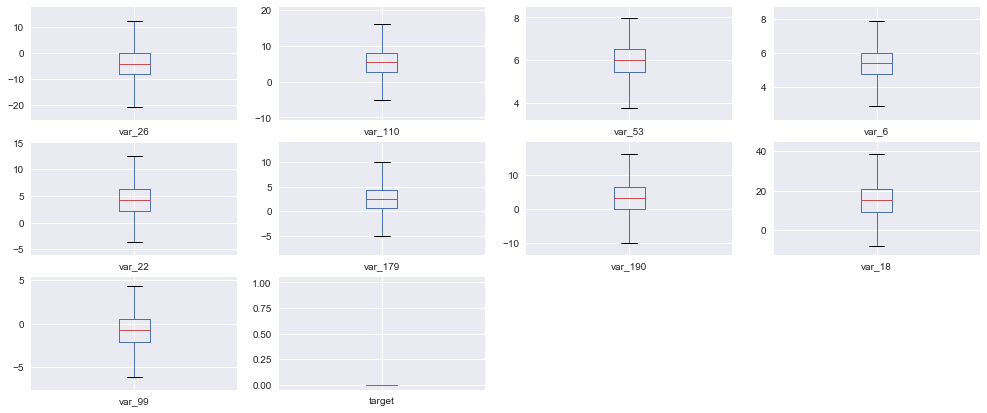

In [20]:
# Box plot of numerical attributes
df_train_subset.plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(17,12))
plt.show()

There are no noticeable outliers in the dataset

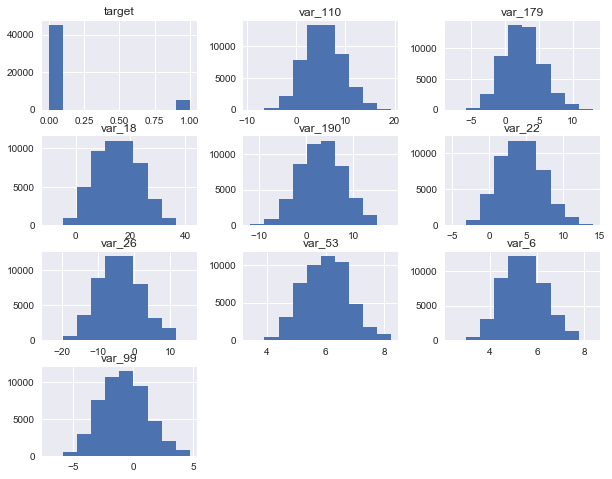

In [21]:
# histograms
df_train_subset.hist(figsize=(10,8))
plt.show()

All the attributes in the subset excluding the target look like they have a Gaussian distribution. This is useful to note as algorithms that can exploit this assumption can be used.

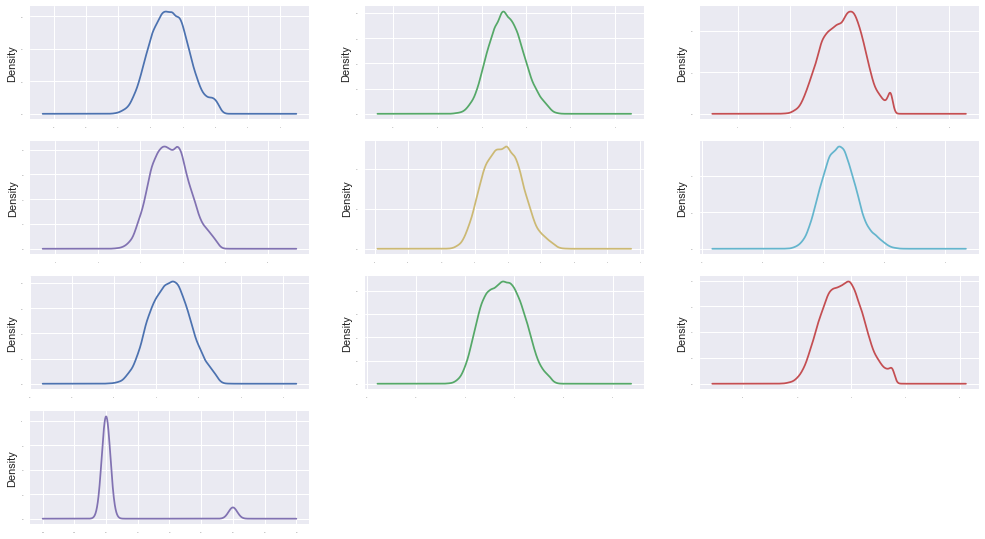

In [19]:
# The same perspective of the data using density plots.
df_train_subset.plot(kind= 'density' , subplots=True, sharex=False, legend=False, fontsize=1,figsize=(17,12),layout=(5,3))
plt.show()